In [22]:
import numpy as np
import matplotlib.pyplot as plt
from hilp import load_csv_data
from helper import *
from costs import *
from least_squares import *
from ridge_regression import *
from logistic_regression import *
from cross_validation import *

In [23]:
yb_tr, input_data_tr, ids_tr = load_csv_data('data/train.csv')

In [24]:
yb_te, input_data_te, ids_te = load_csv_data('data/test.csv')

In [25]:
input_data_tr.shape

(250000, 30)

In [26]:
cleaned_columns_tr = [c for c in input_data_tr.T if (c==-999).sum()/len(c) < 0.2]
print(np.shape(cleaned_columns_tr))
for c in cleaned_columns_tr:
    numb_of_nan = (c==-999).sum()
    median = np.median(list(filter(lambda x : x!= -999, c)))
    c[c == -999] = median

(20, 250000)


In [27]:
initial_w = np.random.randint(0,1,21)
batch_size = 1
max_iters = 100
gamma = 0.01
lambda_ = 0.01

In [28]:
# standardize the data
std_data_tr, mean_tr, std_tr = standardize(np.transpose(cleaned_columns_tr))

In [29]:
# build the model (add 1's for the w0)
tx, y = build_model_data(std_data_tr, yb_tr)

In [30]:
gammas = [0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

the best with gamma =  0.04 is : 0.3902237342165204
the best with gamma =  0.05 is : 0.38629175452820413
the best with gamma =  0.06 is : 0.38363250455436454
the best with gamma =  0.07 is : 0.3817958837217635
the best with gamma =  0.08 is : 0.3804953663539625
the best with gamma =  0.09 is : 0.37954782814316324
the best with gamma =  0.1 is : 0.3788357544038105


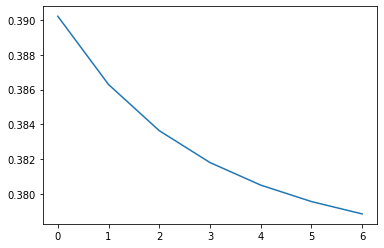

In [34]:
import matplotlib.pyplot as plt

min_losses = []
for gamma in gammas:
    losses, ws = gradient_descent(y, tx, initial_w, max_iters, gamma)
    min_loss = min(losses)
    idx_best = np.argmin(losses)
    print("the best with gamma = ", gamma, "is :", min_loss)
    min_losses.append(min_loss)
    
plt.plot(min_losses)

In [61]:
stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma)

SGD iter. 0/99: loss=0.5, w0=-1.0, w1=8.722000637353025
SGD iter. 1/99: loss=479.2448936319159, w0=-2.0258878376099765, w1=7.975921017229388
SGD iter. 2/99: loss=526.5960486257377, w0=11.565807652272087, w1=16.429799295145887
SGD iter. 3/99: loss=7504.608819383644, w0=-41.97951311058407, w1=-9.81190995123863
SGD iter. 4/99: loss=3533.9626665824235, w0=55.964350943113054, w1=96.07580556319132
SGD iter. 5/99: loss=125957.08849237057, w0=-322.44153176565356, w1=-117.90594682833583
SGD iter. 6/99: loss=1247507.2002499066, w0=694.7076928843892, w1=1139.1660094027193
SGD iter. 7/99: loss=7522118.826822765, w0=-507.9539861014366, w1=1124.6035996317341
SGD iter. 8/99: loss=15524072.368737074, w0=1432.8188538971121, w1=3105.6324772856306
SGD iter. 9/99: loss=102137989.04349951, w0=-7912.521187582393, w1=-1512.4659793450346
SGD iter. 10/99: loss=796997438.487705, w0=15607.505646791344, w1=16153.54562215853
SGD iter. 11/99: loss=1620007037.635084, w0=-24483.316145087665, w1=-17181.539850222962
SG

SGD iter. 88/99: loss=2.133007978025501e+88, w0=-1.557920915003128e+43, w1=5.707131120947237e+43
SGD iter. 89/99: loss=4.612046215272524e+88, w0=-2.4315048742425118e+44, w1=-1.1084555727423072e+44
SGD iter. 90/99: loss=1.0837130041927574e+90, w0=6.282057713348941e+44, w1=2.50405670076914e+44
SGD iter. 91/99: loss=1.3023488486246418e+90, w0=-1.1136945888735494e+45, w1=-1.4583046352399983e+45
SGD iter. 92/99: loss=1.3676061016423774e+91, w0=-1.1516354605464688e+46, w1=8.927370265963473e+46
SGD iter. 93/99: loss=5.099714415928675e+94, w0=-9.538597787341591e+45, w1=9.017119213861727e+46
SGD iter. 94/99: loss=5.131723776595262e+94, w0=-6.859783098276151e+46, w1=4.1996749367706783e+46
SGD iter. 95/99: loss=4.759264456576096e+94, w0=1.4750503601766192e+47, w1=1.868832265206705e+47
SGD iter. 96/99: loss=9.038928610060358e+95, w0=-1.9626371745483504e+48, w1=-2.945037919150402e+48
SGD iter. 97/99: loss=3.021470309320638e+98, w0=1.7908754137559898e+49, w1=1.0919195016242232e+49
SGD iter. 98/99: l

([0.5,
  479.2448936319159,
  526.5960486257377,
  7504.608819383644,
  3533.9626665824235,
  125957.08849237057,
  1247507.2002499066,
  7522118.826822765,
  15524072.368737074,
  102137989.04349951,
  796997438.487705,
  1620007037.635084,
  38473025135.56647,
  14770559186.583954,
  25395874823811.234,
  661942489799167.6,
  1.335639660888758e+16,
  3.56458753305961e+17,
  1.4094662014814663e+19,
  1.715404548016629e+20,
  4.444063053517585e+22,
  4.095663244986056e+22,
  4.600024263423158e+22,
  6.847261600749527e+23,
  2.457920724648249e+24,
  4.324922830095519e+25,
  5.320265162469985e+27,
  2.008781720660691e+27,
  1.5042098804166483e+28,
  4.4913831649973204e+27,
  9.124164617695791e+27,
  2.982888126644577e+28,
  2.6502193986788546e+31,
  2.665954248418147e+31,
  2.5259289338769885e+32,
  5.924151606760807e+31,
  7.253833644548932e+33,
  9.775515933058957e+33,
  4.583009643122835e+35,
  1.596336333524093e+37,
  1.615560593000922e+37,
  1.7235296963169852e+37,
  5.2228354470353

In [62]:
least_squares(y, tx)

(array([ 2.47420969e+02,  8.72953321e-03, -8.60393022e-01, -7.44033545e-01,
        -3.02047473e-02,  4.07177443e+01, -2.16728350e-01, -3.84116241e+02,
        -2.65345104e+01,  1.29879394e+01,  3.85148465e+02, -8.18119382e-02,
        -5.48863792e-02,  3.85674207e+02, -6.53199155e-02,  1.50067958e-01,
         4.44182441e-01,  5.63110482e-02, -7.04411923e-02,  9.90607567e+00,
         3.84052470e+02]),
 0.35227959197930947)

In [32]:
ridge_regression(y, tx, lambda_)

array([ 1.93785501e-01,  1.19853708e-02,  2.20471543e-05, -7.70834786e-03,
       -8.21151111e-03, -9.12246743e-02,  1.14852885e-03, -9.19499432e-02,
       -8.97526191e-02, -2.33985162e-02,  4.64164937e-02, -9.17762539e-02,
       -9.47047232e-02, -9.37821525e-02, -5.15263586e-02, -9.30399231e-02,
       -9.33596874e-02, -3.88874080e-02, -9.29562299e-02, -9.32584113e-02,
       -4.01187987e-03, -9.29761271e-02,  1.25237773e-02, -9.29443796e-02,
        1.94551957e-03, -9.32788228e-02, -9.44503495e-02, -3.38115911e-03,
       -9.39210854e-02, -9.43539384e-02, -5.23854932e-02])

In [35]:
logistic_regression(y, tx, initial_w, max_iters, gamma)

Logistic regression iter. 0/19: loss=0.6095508480082479, w0=0.01, w1=0.008683684348444435
Logistic regression iter. 1/19: loss=0.5432798167161887, w0=0.019119667676813133, w1=0.016568756473440284
Logistic regression iter. 2/19: loss=0.4898345064530418, w0=0.027479939565090556, w1=0.023765734003225063
Logistic regression iter. 3/19: loss=0.4458888188011732, w0=0.03518972005821683, w1=0.030374592134278185
Logistic regression iter. 4/19: loss=0.40911551655023787, w0=0.04233964626234195, w1=0.03647871961535797
Logistic regression iter. 5/19: loss=0.37788054561660445, w0=0.049003742219134235, w1=0.0421462646222442
Logistic regression iter. 6/19: loss=0.35101233379136054, w0=0.05524259482144874, w1=0.04743297586560574
Logistic regression iter. 7/19: loss=0.327650568016991, w0=0.06110622591363274, w1=0.052384818299288725
Logistic regression iter. 8/19: loss=0.3071490868209136, w0=0.066636358246811, w1=0.057040056653607535
Logistic regression iter. 9/19: loss=0.28901270484426, w0=0.07186814248

([0.6095508480082479,
  0.5432798167161887,
  0.4898345064530418,
  0.4458888188011732,
  0.40911551655023787,
  0.37788054561660445,
  0.35101233379136054,
  0.327650568016991,
  0.3071490868209136,
  0.28901270484426,
  0.27285517319558455,
  0.2583705170967268,
  0.2453130348255886,
  0.23348303984888585,
  0.2227164993708705,
  0.21287737305695947,
  0.2038518595538764,
  0.1955440148701578,
  0.18787237309004196,
  0.18076731010477753],
 [array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([ 0.01      ,  0.00868368,  0.0006656 ,  0.00425426,  0.00163087,
         -0.00463566,  0.02539762, -0.00492885, -0.0046147 , -0.00274306,
          0.01298782, -0.00471999, -0.00489638, -0.00483065, -0.0005242 ,
         -0.00488344, -0.00488382,  0.00037821, -0.00488422, -0.00487623,
         -0.00019389, -0.00488299,  0.01876427, -0.00477169,  0.00382314,
         -0.00488207, -0.00488572,  0.00085039, -0.00488319, -0.0048847

In [36]:
reg_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma)

Reg Logistic regression iter. 0/19: loss=0.6095508480238322, w0=0.01, w1=0.008683684348444435
Reg Logistic regression iter. 1/19: loss=0.5432798167841847, w0=0.019119667675053305, w1=0.01656875647191211
Reg Logistic regression iter. 2/19: loss=0.4898345065966591, w0=0.027479939560113124, w1=0.023765733998914174
Reg Logistic regression iter. 3/19: loss=0.44588881903528166, w0=0.03518972004879419, w1=0.030374592126137568
Reg Logistic regression iter. 4/19: loss=0.40911551688451137, w0=0.04233964624742148, w1=0.03647871960249711
Reg Logistic regression iter. 5/19: loss=0.37788054605734767, w0=0.049003742197799, w1=0.04214626460389279
Reg Logistic regression iter. 6/19: loss=0.35101233434261353, w0=0.055242594792889295, w1=0.04743297584108781
Reg Logistic regression iter. 7/19: loss=0.3276505686812278, w0=0.061106225877126365, w1=0.052384818268003695
Reg Logistic regression iter. 8/19: loss=0.307149087599503, w0=0.06663635820170606, w1=0.05704005661501606
Reg Logistic regression iter. 9/19

([0.6095508480238322,
  0.5432798167841847,
  0.4898345065966591,
  0.44588881903528166,
  0.40911551688451137,
  0.37788054605734767,
  0.35101233434261353,
  0.3276505686812278,
  0.307149087599503,
  0.2890127057377779,
  0.27285517420403255,
  0.25837051821968804,
  0.24531303606234048,
  0.23348304119848245,
  0.22271650083220482,
  0.21287737462880948,
  0.20385186123493954,
  0.195544016659078,
  0.18787237498542947,
  0.18076731210522484],
 [array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([ 0.01      ,  0.00868368,  0.0006656 ,  0.00425426,  0.00163087,
         -0.00463566,  0.02539762, -0.00492885, -0.0046147 , -0.00274306,
          0.01298782, -0.00471999, -0.00489638, -0.00483065, -0.0005242 ,
         -0.00488344, -0.00488382,  0.00037821, -0.00488422, -0.00487623,
         -0.00019389, -0.00488299,  0.01876427, -0.00477169,  0.00382314,
         -0.00488207, -0.00488572,  0.00085039, -0.00488319, -0.0

In [11]:
# cross validation ridge regression
degree = 3
k_fold = 4
lambdas = np.logspace(-7, 0, 8)
degrees = [3, 5, 7]
print(lambdas)
seed = 1

[1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00]


In [12]:
k_indices = build_k_indices(y, k_fold, 1)

1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
For polynomial expansion up to degree 3, the choice of lambda which leads to the best test rmse is 0.00001 with a test rmse of 0.001


(1e-05, 0.0009792517256816404)

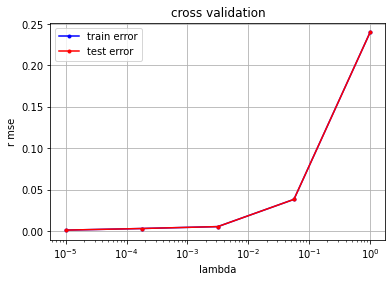

In [20]:
cross_validation_demo(degree, k_fold, lambdas, y, tx)

In [13]:
best_degree_selection(degrees, k_fold, lambdas, seed, y, tx)

1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,5
4
4,5
1
2
3
3,

(3, 1e-07, 3.218880877597271e-05)